**GRUPO 3**

Membros:
* Isabela Tamie Shihara - RGM: 11231203887

* Luisa Alves de Souza - RGM: 11251401903

* Matheus Martins de Souza - RGM: 11251401900

* Samuel Oliveira Acácio - RGM: 11231100856

Curso: Engenharia de Software

Turma: 6º A Matutino

Disciplina: Inteligência Artificial

Prof. Dr. Fabiano Menegidio

# 🍄 Classificação de Cogumelos – Cenário S3 (Gill-size) usando SVM

## Objetivo Geral:
Este notebook tem como objetivo avaliar se a morfologia e tamanho das lamelas pode ser usada para classificar cogumelos comestíveis (e) ou venenosos (p).

Para isso, foi utilizado o **Dataset:** Mushroom analisando o atributo Gill-size (Cenário S3).

Também foram necessárias as **Bibliotecas:** scikit-learn (SVC, cross_val_score, GridSearchCV, métricas), pandas, numpy, matplotlib.

## Contexto do Cenário:
 🍄 O dataset **Mushroom** contém 8.124 cogumelos classificados como **comestíveis (e)** ou **venenosos (p)**, descritos por 22 atributos morfológicos e ambientais.
 No **cenário S3 – Gill-size**, o foco é o atributo **gill-size**, que representa o tamanho das lamelas (estruturas abaixo do chapéu do cogumelo responsáveis pela produção e dispersão de esporos).

 Valores possíveis:
- **broad** → lamelas largas
- **narrow** → lamelas estreitas

Neste cenário, cada cogumelo é representado apenas pelo tamanho da lamela (via **One-Hot Encoding**) e pela coluna `class`.

**Questão central:** será que o tamanho da lamela é suficiente para prever se um cogumelo é venenoso?

Nesse notebook foi realizado o treino de um classificardor SVM nesse subconjunto e foram avaliadas as métricas como acurácia e matriz de confusão para a classe venenosa.

Essa análise permitiu refletir sobre a importância de características morfológicas específicas e seus limites na predição da toxicidade.

Utilizamos: GridSearchCV para buscar os melhores hiper-parâmetros (kernel, C e gamma), além de cross-validation.

## Objetivos Específicos:
* Avaliar se essa característica morfológica isolada (lamelas) tem real poder preditivo.
* Avaliar a eficácia da predição utilizando métricas de acurácia e matriz de confusão
* Entender os limites da predição desses atributos específicos.



## Explicação da Estrutura do Modelo:


**1 - Atributos e Variáveis:**

df: Variável que armazena o dataset CSV em formato de tabela (dataframe)

y: Variável que armazena a coluna alvo, orde será feita a previsão.

cv: Variável que define o método de Validação Cruzada, dividindo em 5 grupos.

x: Variável que armazena as informações para treinar o modelo, onde todas as colunas menos a class contém as características do cogumelo.

x_train: Variável que armazena a parte para treinar o modelo 80%.

x_Test: Variável que armazena  a parte para testar o modelo 20%.

y_train: Variável que armazena a parte de y para treinar o modelo.

y_test: Variável que armazena  a parte do modelo

test_size=0.2 : Variável que define o treino/teste (80%/20%).

model: Variável que armazena o modelo SVM, sendo linear ou RBF, dependendo do kernel.

y_pred: Variável que armazena as previsões do modelo sobre os dados de teste (x_test).

acc: Variável que armazena a acurácia do modelo  usando y_test e y_pred, mostrando os erros e acertos do modelo. ConfuisionMatrixDisplay.

from_predictions: Função que gera a Matriz de Confusão, usando os valores de y_test e preditos y_pred, para visualizar os erros e acertos do modelo.

gs: Variável que armazena o GridSearchCV, que realiza a busca automática dos melhoreshiperparâmetros com Validação Cruzada.

param_grid: Parâmetro que define a grade de valores em todas as combinações possíveis e escolhendo a melhor.


**2  - Sequência Lógica do Código:**

Carregar e visualizar o Dataset Mushroom Gill-size.

Dropar todas as colunas menos class no CSV.

Coluna alvo (comestível/venenoso).

Labels legíveis para a matriz de confusão.

Divisão dos dados em treino e teste.

Treinar o SVM com kernel linear e kernel RBF.

Encontrar o melhor hiperparâmetro utilizando o método GridSearchCV (kernel, C e gamma).

Avaliar o modelo final com acurácia e matriz de confusão.

Aplicar Cross-Validation para validar estabilidade do modelo.

**3  - Resultados dos Testes:**
  
SVM Linear → Acurácia = ~77%

SVM RBF → Acurácia = ~77%

**Busca de hiperparâmetros (GridSearchCV):**
   
Kernels Testados: linear, rbf, poly, sigmoid

Valores de C: 0.1, 1, 10

Valores de gamma: scale, 0.01, 0.1, 1

Melhor combinação: kernel=linear, C=0.1, gamma=scale

**Acurácia final = ~77%**

Validação cruzada (Cross-validation): mostrou resultados muito próximos em todas as combinações, indicando que o atributo sozinho não traz muita variação de desempenho.

Matriz de confusão: mostrou acertos, mas também erros em classificar venenosos como comestíveis (o que é arriscado).

## Estrutura do Código com Comentários

In [ ]:
# 0) Importação de Bibliotecas e Configuração Global do Modelo
from sklearn import datasets
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

RANDOM_STATE = 42
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

Formas: X_train (6499, 2) | X_test (1625, 2)
Distribuição de classes (treino): [3366 3133]
Distribuição de classes (teste) : [842 783]
[MUSHROOM S3] Linear — Acurácia: 77.35%
Preditos (10): ['e' 'p' 'e' 'p' 'e' 'p' 'e' 'e' 'e' 'p']
Reais    (10): ['p' 'p' 'e' 'p' 'p' 'e' 'e' 'e' 'e' 'p']


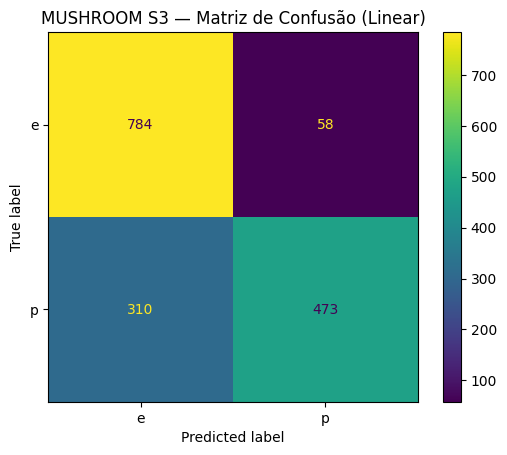

[MUSHROOM S3] RBF — Acurácia: 77.35%


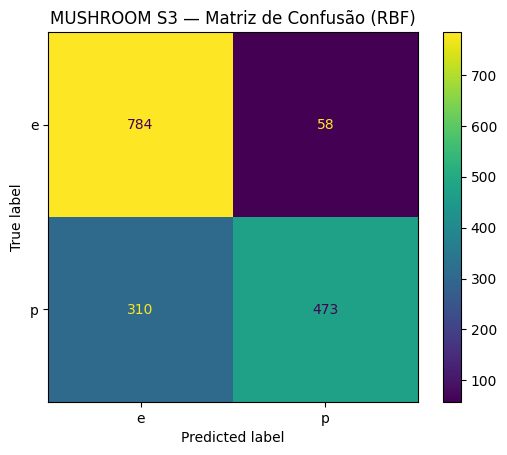

[MUSHROOM S3] Melhor combinação (GridSearch): {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
[MUSHROOM S3] Acurácia teste (melhor kernel): 77.35%


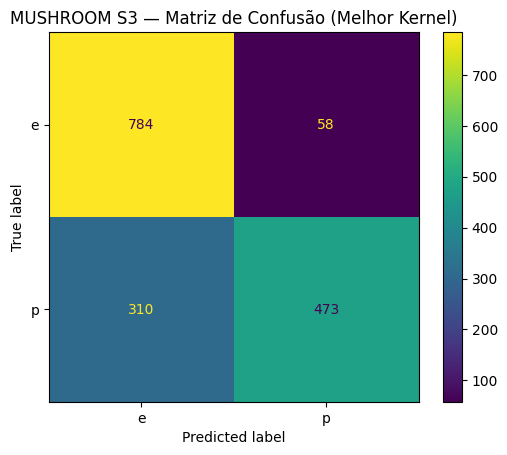

[MUSHROOM S3] CV média (RBF) variando C e gamma:
  C=0.1, gamma=1: mean=0.7563
  C=0.1, gamma=0.1: mean=0.7563
  C=0.1, gamma=0.01: mean=0.7563
  C=1, gamma=1: mean=0.7563
  C=1, gamma=0.1: mean=0.7563
  C=1, gamma=0.01: mean=0.7563
  C=10, gamma=1: mean=0.7563
  C=10, gamma=0.1: mean=0.7563
  C=10, gamma=0.01: mean=0.7563


In [ ]:
# 1) Carregar dataset
df = pd.read_csv("mushroom_s3_gillsize_ohe.csv")

# X = todas as colunas menos "class"
X = df.drop("class", axis=1).values

# y = a coluna alvo (comestível/venenoso)
y = df["class"].values   # já deve estar binário (ex: 0/1 ou e/p convertido)

# Labels legíveis para a matriz de confusão
labels = np.unique(y)


# 2) Divisão treino/teste estratificada
RANDOM_STATE = 42
cv = 5
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)

print("Formas:", "X_train", X_train.shape, "| X_test", X_test.shape)
print("Distribuição de classes (treino):", np.bincount(pd.Series(y_train).astype("category").cat.codes))
print("Distribuição de classes (teste) :", np.bincount(pd.Series(y_test).astype("category").cat.codes))


# 3) Baseline — kernel linear
model = SVC(kernel='linear', random_state=RANDOM_STATE)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"[MUSHROOM S3] Linear — Acurácia: {acc*100:.2f}%")
print("Preditos (10):", y_pred[:10])
print("Reais    (10):", y_test[:10])
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=labels)
plt.title("MUSHROOM S3 — Matriz de Confusão (Linear)")
plt.show()


# 4) Kernel RBF
model = SVC(kernel='rbf', random_state=RANDOM_STATE)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"[MUSHROOM S3] RBF — Acurácia: {acc*100:.2f}%")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=labels)
plt.title("MUSHROOM S3 — Matriz de Confusão (RBF)")
plt.show()


# 5) GridSearchCV (kernel + C + gamma)
gs = GridSearchCV(
    SVC(random_state=RANDOM_STATE),
    param_grid={
        'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
        'C': [0.1, 1, 10],
        'gamma': ['scale', 0.01, 0.1, 1]
    },
    cv=cv, n_jobs=-1
)
gs.fit(X_train, y_train)
y_pred = gs.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("[MUSHROOM S3] Melhor combinação (GridSearch):", gs.best_params_)
print(f"[MUSHROOM S3] Acurácia teste (melhor kernel): {acc*100:.2f}%")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=labels)
plt.title("MUSHROOM S3 — Matriz de Confusão (Melhor Kernel)")
plt.show()


# 6) Cross-Validation
Cs = [0.1, 1, 10]
gammas = [1, 0.1, 0.01]
print("[MUSHROOM S3] CV média (RBF) variando C e gamma:")
for C in Cs:
    for gamma in gammas:
        scores = cross_val_score(SVC(kernel='rbf', C=C, gamma=gamma, random_state=RANDOM_STATE), X, y, cv=cv, n_jobs=-1)
        print(f"  C={C}, gamma={gamma}: mean={scores.mean():.4f}")


## Resumo

Este código foi criado para treinar um modelo, que separa cogumelos comestíveis dos venenosos, usando apenas o tamanho da lamela. Para isso, os dados foram divididos em treino e teste, garantindo que o modelo tivesse exemplos suficientes para aprender, e depois fosse avaliado de forma justa.

O classificador usado foi o SVM, que cria uma fronteira para distinguir as classes. Duas versões foram testadas: a do kernel linear, mais simples, e a do kernel RBF, mais flexível. Para escolher os melhores parâmetros do modelo, foi utilizado o método **GridSearchCV**, que faz testes automáticos e aponta a combinação com maior acurácia.

Além disso, foi aplicado o método Cross-Validation, que repete os testes em diferentes divisões do dataset, evitando que o resultado dependa apenas da sorte da separação inicial.

Com isso, foi possível validar que o modelo realmente aprendeu a identificar o padrão nos dados, e está apto a fazer previsões confiáveis.

# Considerações Finais

Com base nos resultados obtidos, analisando o teste de Acurácia e Matriz de Confusão com Kernel Linear,  Kernel RBF, Poly e Sigmoid, observa-se uma **Acurácia Média**  de 77.35% na predição de Toxicidade do cogumelo usando como parâmetro as lamelas (estruturas abaixo do chapéu do cogumelo responsáveis pela produção e dispersão de esporos).
Considerando que, na Biologia dos Fungos, a morfologia das lamelas pode estar associada à adaptação ecológica e ao modo de dispersão de esporos, nem sempre  sendo uma característica exclusiva de espécies comestíveis ou tóxicas. Ainda assim, o tamanho das lamelas pode oferecer algum poder de discriminação entre grupos de cogumelos, contudo, o tamanho das lamelas por si só não é um forte indicativo de sua toxicidade ou ausência dela (MENEGIDIO, Fabiano, Comunicação Pessoal, 2025).
Por fim, é recomendada a análise de características adicionais para afirmar a toxicidade de cogumelos.